In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Image
import tensorflow as tf
import PIL
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data = pd.read_csv(r"C:\Users\NEW\Documents\Machine Learning Lab\vehcle_img_data.csv")
len(data)

C:\Users\NEW\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


77980

In [3]:
data.dropna(inplace=True)

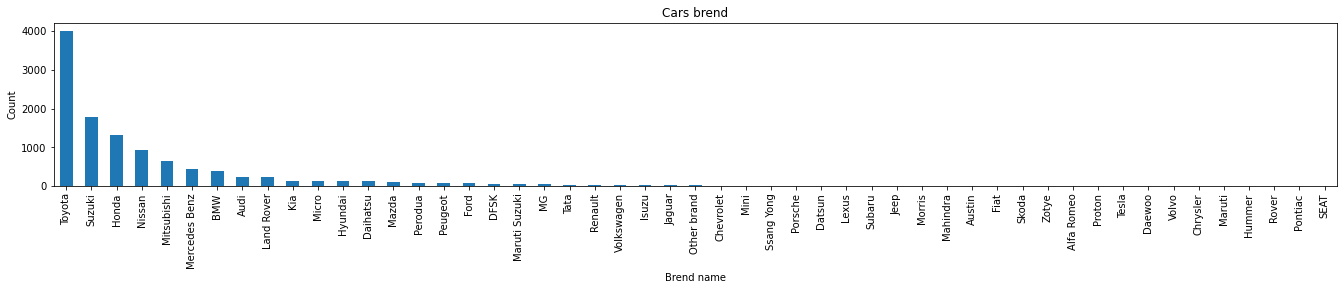

In [4]:
data.Brand.value_counts().plot(kind='bar', figsize=(23, 3))
# commenting the plot 
plt.title("Cars brend")
plt.xlabel("Brend name")
plt.ylabel("Count"); 

In [5]:
data.shape

(11408, 10)

In [6]:
import os
x = os.listdir("C:/Users/NEW/Documents/Machine Learning Lab/vehicle_images/vehicle_images")
len(x)

77977

In [7]:
X = data.Image_Path

In [8]:
y = data.Brand

In [9]:
data['Image_Path'] = 'vehicle_images/'+data['Image_Path']

In [10]:
#print(y[4])
#display(Image(X[4]))

In [11]:
#categorial encoding
def transformer(brand):
    brand_names = brand.value_counts().index
    n = len(brand_names)
    categories = dict(zip(brand_names, range(n)))
    brand.replace(categories, inplace=True)
    return categories

In [12]:
len(transformer(y))

51

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [14]:
def image_processing(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, size=[220, 220])
    return img

In [15]:
def image_labelling(img_path, label):
    img = image_processing(img_path)
    return img, label

In [16]:
#from torch.nn import ReLU

def classification_model():
    data_handling = Sequential([
        layers.RandomFlip('horizontal', input_shape=(220, 220, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1)
    ])
    
    model = Sequential([
        data_handling,
        Conv2D(32, 5, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        
        Conv2D(32, 5, padding='same', activation='relu'),
        layers.MaxPooling2D(),

        Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),

        Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        
        Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        
        layers.Dense(51, layers.Dense(51, activation='softmax'))
    ])
    
    model.compile(optimizer = tf.keras.optimizers.SGD(), 
                 loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 metrics=['accuracy'])
    
    return model

model = classification_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 220, 220, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 220, 220, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 32)      25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 55, 55, 64)       

In [17]:
tf.__version__

'2.8.0'